In [171]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import re
import demoji

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from PIL import Image

import requests
from bs4 import BeautifulSoup

def delURL(content, condition=True):
    return (re.sub(r'http\S+', '', content) if condition else content)

def findURL(content):
    return re.findall(r'http\S+', content)

def delother(content):
    content = content.split('\n')
    content = ' '.join(content)
    content = demoji.replace(content, repl='')
    return content

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

# def sentiment_scores(sentence):
 
#     # Create a SentimentIntensityAnalyzer object.
#     sid_obj = SentimentIntensityAnalyzer()
 
#     # polarity_scores method of SentimentIntensityAnalyzer
#     # object gives a sentiment dictionary.
#     # which contains pos, neg, neu, and compound scores.
#     sentiment_dict = sid_obj.polarity_scores(sentence)
     
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
#     print("Sentence Overall Rated As", end = " ")
 
#     # decide sentiment as positive, negative and neutral
#     if sentiment_dict['compound'] >= 0.05 :
#         print("Positive")
 
#     elif sentiment_dict['compound'] <= - 0.05 :
#         print("Negative")
 
#     else :
#         print("Neutral")

# Grap Data #

In [222]:
scraper = sntwitter.TwitterSearchScraper('($googl) -$amzn -$meta -filter:links -filter:replies within_time:180d lang:en')
tweets = []
samples=80
for i, tweet in tqdm(enumerate(scraper.get_items()), total=samples):
    data = [
        tweet.date,
        tweet.id,
        tweet.content,
        tweet.user.username,
        tweet.likeCount,
        tweet.retweetCount,
        tweet.url,
        TextBlob(delother(delURL(tweet.content))).polarity,
        sentiment_scores(delother(delURL(tweet.content)))['neg'],
        sentiment_scores(delother(delURL(tweet.content)))['neu'],
        sentiment_scores(delother(delURL(tweet.content)))['pos'],
        sentiment_scores(delother(delURL(tweet.content)))['compound'],
        (TextBlob(delother(delURL(tweet.content))).polarity + sentiment_scores(delother(delURL(tweet.content)))['compound'])/2
    ]
    tweets.append(data)
    if i>samples:
        break

  0%|          | 0/80 [00:00<?, ?it/s]

C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:8: FutureWarning: content is deprecated, use rawContent instead
  tweet.content,
C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:13: FutureWarning: content is deprecated, use rawContent instead
  TextBlob(delother(delURL(tweet.content))).polarity,
C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:14: FutureWarning: content is deprecated, use rawContent instead
  sentiment_scores(delother(delURL(tweet.content)))['neg'],
C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:15: FutureWarning: content is deprecated, use rawContent instead
  sentiment_scores(delother(delURL(tweet.content)))['neu'],
C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:16: FutureWarning: content is deprecated, use rawContent instead
  sentiment_scores(delother(delURL(tweet.content)))['pos'],
C:\Users\Killicit\AppData\Local\Temp\ipykernel_28340\2934147868.py:17: FutureWarning: cont

# Data to Dataframe #

In [225]:
df = pd.DataFrame(tweets, columns=['date', 'id', 'content', 'username', 'likes', 'retweets', 'url', 'SA_byTextblob', 'SA_byVader_neg', 'SA_byVader_neu', 'SA_byVader_pos', 'SA_byVader', 'SA'])
df.loc[:, 'content']

0     AI made review of  $GOOGL's coverage today - \...
1           Google’s back in the game !! $GOOGL #Google
2     The fact that @Google even NEEDS to have a pri...
3     If you're in your early 20s you have something...
4     Quick Update\n\nChatGPT Has The Potential To D...
                            ...                        
77    Trade Idea: $GOOGL Jan 27 2023 101 Call (Weekl...
78                                   $GOOGL Call buying
79    $GOOGL Strike: 99.00 Expiration: 2023-01-27 Pu...
80    $GOOGL Strike: 200.00 Expiration: 2024-01-19 C...
81    New MOMO Trend 2 only from Mometic    \n$GOOGL...
Name: content, Length: 82, dtype: object

# Textblob and Vader api compare #

In [226]:
for i in range(0, len(df)):
    print(delURL(df.loc[i, 'content']))
    print(df.loc[i, 'SA_byTextblob'])
    print(df.loc[i, 'SA_byVader'])
    print('-------')
    # 'SA_byTextblob', 'SA_byVader_neg', 'SA_byVader_neu', 'SA_byVader_pos', 'SA_byVader'

AI made review of  $GOOGL's coverage today - 

Google (GOOGL) had a strong week, with positive results from Nasdaq Bear Market, FAANG stocks, and Cathie Wood stocks. #GOOGL #Nasdaq #FAANG #CathieWood
0.33030303030303027
0.7845
-------
Google’s back in the game !! $GOOGL #Google
-0.3125
0.0
-------
The fact that @Google even NEEDS to have a privacy policy for its CLOCK APP is utterly terrifying.
$GOOGL $GOOG @Android
-1.0
-0.6115
-------
If you're in your early 20s you have something a lot of people don't have - TIME. 

- Start investing in stocks
- Learn about real estate
- Focus on growing as a person
- Start a side business

Your 20's can literally set you up for the rest of your life.
$AAL $FB $GOLD $GOOGL
0.15000000000000002
0.1779
-------
Quick Update

ChatGPT Has The Potential To Destroy Google In A Year Or Two At Max, The Creator Of Gmail Paul Buccheit

Buccheit Thinks That Chatgpt Will Eliminate Google’s Most Money-Making Product, Aka Search Etc.

#Google #Gmail #ChatGPT $GOOGL

In [227]:
print(df.loc[:, 'SA_byTextblob'].sum())
print(df.loc[:, 'SA_byVader'].sum())

3.62347582972583
4.0527999999999995


In [213]:
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:101.0) Gecko/20100101 Firefox/101.0
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:101.0) Gecko/20100101 Firefox/101.0'}
linkInTweets = pd.DataFrame()
for i in range(0, len(df)):
    for url in findURL(df.loc[i,'content']):
        try:
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, "html.parser")
            soupText = delother(delURL(soup.getText()))
            linkInTweets = pd.concat([pd.DataFrame({'textInURL': [soupText], 'SA':[sentiment_scores(soupText)['compound']], 'URL':[url], 'TweetID':[df.loc[i, 'id']]}), linkInTweets], ignore_index=True)
        except:
            print(f'{url} not accessable')
    # if i == 7:
    #     break

In [214]:
linkInTweets

""


# Keywords in positive results #

,count
GOOGL,6
today,2
stocks,2
AI,1
slowing,1
making,1
weekly,1
gains,1
StockMarket,1
DailyEvents,1


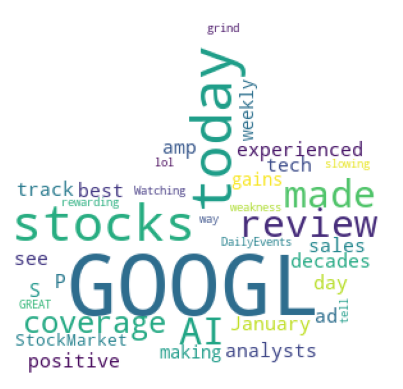

In [228]:
text = df[df['SA']>0.6].content.to_list() #positive results
text = ' '.join(text)

# the keywords that should be ignored
from wordcloud import STOPWORDS
stopwords = STOPWORDS.update(['https', 't co', 't', 'co'])

# add a image mask to viusualize data
pngfile = './like.png'
img_color_mask = np.array(Image.open(pngfile))

# show keywords by image
wordcloud = WordCloud(stopwords=stopwords, background_color='white', mask=img_color_mask, max_words=200).generate(text)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud)

# show keywords by dataframe
keyword_count = pd.DataFrame.from_dict(WordCloud().process_text(text), orient='index').rename(columns={0:'count'})
keyword_count.sort_values(by='count', ascending=False)

In [229]:
print(df.query('SA > 0.6').content.to_list())

["AI made review of  $GOOGL's coverage today - \n\nGOOGL stocks experienced a positive day as analysts see ad sales on track, tech stocks having best January in decades, and S&amp;P 500 making weekly gains. #GOOGL #StockMarket #DailyEvents", "Watching $GOOGL slowing grind it's way to $100 is so rewarding lol", '$GOOGL The weakness in GOOGL has been a GREAT tell today']


# Keywords in negative results #

,count
GOOGL,3
f,2
c,2
kr,1
iep,1
hlf,1
ibm,1
ko,1
pep,1
ms,1


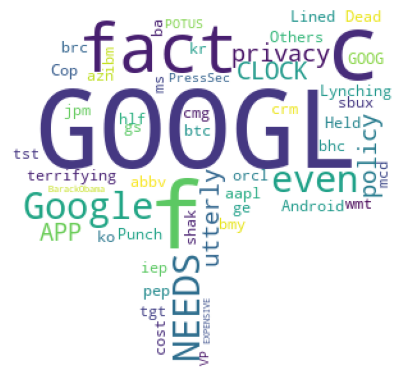

In [230]:
text = df[df['SA']<-0.3].content.to_list() #negative results
text = ' '.join(text)

# the keywords that should be ignored
from wordcloud import STOPWORDS
stopwords = STOPWORDS.update(['https', 't co', 't', 'co'])

# add a image mask to viusualize data
pngfile = './dislike.png'
img_color_mask = np.array(Image.open(pngfile))

# show keywords by image
wordcloud = WordCloud(stopwords=stopwords, background_color='white', mask=img_color_mask, max_words=200).generate(text)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud)

# show keywords by dataframe
keyword_count = pd.DataFrame.from_dict(WordCloud().process_text(text), orient='index').rename(columns={0:'count'})
keyword_count.sort_values(by='count', ascending=False)

In [231]:
print(df[df['SA']<-0.3].content.to_list())

['The fact that @Google even NEEDS to have a privacy policy for its CLOCK APP is utterly terrifying.\n$GOOGL $GOOG @Android', "The Cop Lined Up For A Punch While Others Held Him Up Is ~ A Lynching. He's Dead\n$aapl $abbv $brc $ba $bhc $crm $cmg $did $f $ge $f $tst $iep $hlf $ibm $ko $pep $ms $gs $jpm $cs $c $wmt $tgt $kr $mcd $cost $sbux $azn $bmy $btc $orcl $googl $shak \n@POTUS\n@PressSec\n@VP\n@BarackObama", '$GOOGL TOO EXPENSIVE?!']


In [1]:
t='.abc'
t[1:]

'abc'